# AKIGORA

In [474]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

### Traitement des données

In [475]:
DFexp0 = pd.read_excel('Indicateurs_a_envoyer_aux_etudiants_Simplon.xlsx', sheet_name = 'Collection Experts')

In [476]:
DFexp0

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,01/11/2023,1701460182590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,1701448860078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,1.0,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,1701426872307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,"[{""date"":612396000000,""dateEnd"":1688421600000,...","[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,1701439187742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,30/10/2023,1701364372080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,NaN,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,1635344634004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,NaN,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,1660553442806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,1652341680180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [477]:
DFexp1 = DFexp0
DFexp1['updatedAt'] = pd.to_datetime(DFexp0['updatedAt'], unit='ms') #changement de type int a date

In [478]:
DFexp1['createdAt'] = pd.to_datetime(DFexp0['createdAt'], format='%d/%m/%Y', errors='coerce') # changement du format

In [479]:
DFexp1['linkedInImport'] = DFexp0['linkedInImport'].fillna(0).astype(bool) #NaN = 0, changement de float a Booleen

In [485]:
seuil_non_nullite = int(0.85 * len(DFexp0))

DFexp2 = DFexp1.dropna(axis=1, thresh=seuil_non_nullite)
DFexp2.shape

(2455, 11)

In [487]:
DFexp2.shape

(2455, 11)

In [482]:
DFexp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   _id             2455 non-null   object        
 1   type            2455 non-null   object        
 2   userId          2455 non-null   object        
 3   createdAt       2220 non-null   datetime64[ns]
 4   updatedAt       2455 non-null   datetime64[ns]
 5   domains         2133 non-null   object        
 6   experiences     2191 non-null   object        
 7   visible         2143 non-null   float64       
 8   percentage      2228 non-null   float64       
 9   linkedInImport  2455 non-null   bool          
 10  geo             2144 non-null   object        
dtypes: bool(1), datetime64[ns](2), float64(2), object(6)
memory usage: 194.3+ KB


## Departement RH

### Nombre d'experts inscrit sur la plateforme

In [488]:
#Le nombre d'inscrit sur la plateforme est tout simplement le nombre de lignes que compose le dataframe soit.
Nb_experts = DFexp2.shape[0]
Nb_experts

2455

In [489]:
#Le nombre d'inscrit par periode : On va prendre en compte la date de creation d'un compte
Debut = min(DFexp2['createdAt'])
Debut

Timestamp('2018-07-30 00:00:00')

In [472]:
# Convert 'createdAt' to datetime type and handle None values
DFexp2['createdAt'] = pd.to_datetime(DFexp0['createdAt'], errors='coerce')

C:\Users\simplon\AppData\Local\Temp\ipykernel_7044\1206553945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFexp2['createdAt'] = pd.to_datetime(DFexp0['createdAt'], errors='coerce')


In [490]:
DFexp2 = DFexp1.dropna(subset=['createdAt']).copy()

# Définir 'createdAt' comme index
DFexp2.set_index('createdAt', inplace=True)

# Resample par trimestre et agréger les IDs
trimester_groups = DFexp2.resample('2Q')['_id'].agg(list)

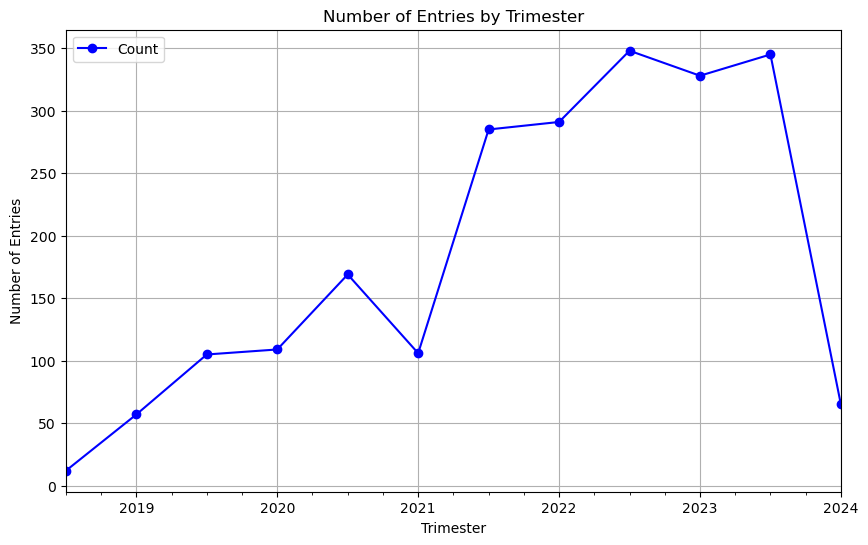

In [491]:
# Plotting the data (optional)
trimester_groups_df = pd.DataFrame({'Count': DFexp2.resample('2Q').size()})
trimester_groups_df.plot(kind='line', marker='o', linestyle='-', color='b', figsize=(10, 6))

plt.title('Number of Entries by Trimester')
plt.xlabel('Trimester')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.show()

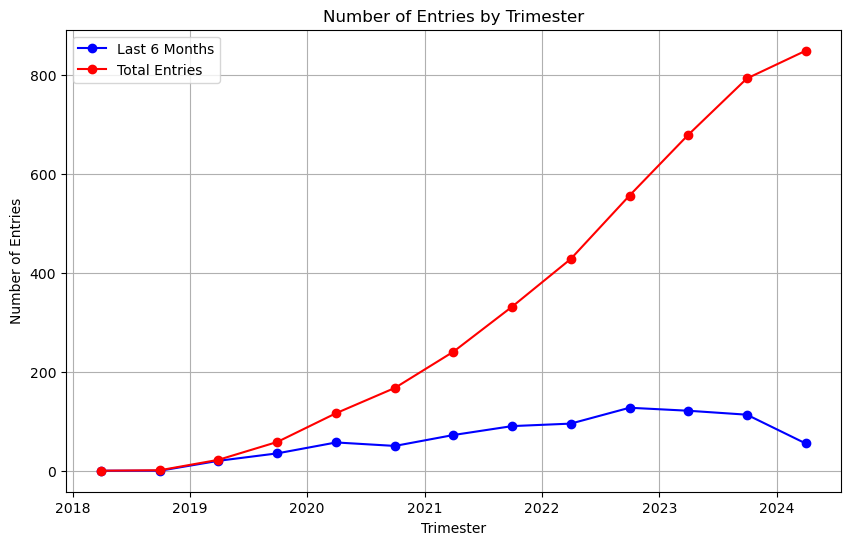

In [351]:
total_entries = DFexp2.resample('2Q').size().cumsum()

total_entries_df = pd.DataFrame({'Total Entries': total_entries})

plt.figure(figsize=(10, 6))

plt.plot(trimester_groups_df.index, trimester_groups_df['Count'], marker='o', linestyle='-', color='b', label='Last 6 Months')

plt.plot(total_entries_df.index, total_entries_df['Total Entries'], marker='o', linestyle='-', color='r', label='Total Entries')

plt.title('Number of Entries by Trimester')
plt.xlabel('Trimester')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.legend()
plt.show()


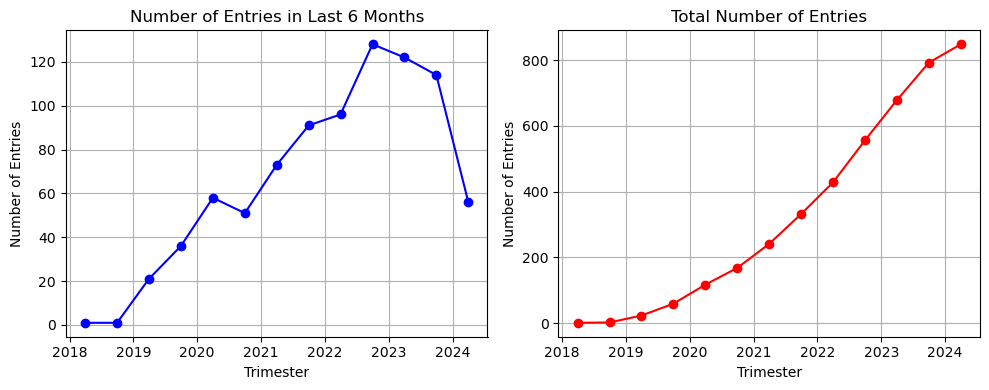

In [352]:
# Calculer le nombre total d'inscriptions depuis le début
total_entries = DFexp2.resample('2Q').size().cumsum()

# Créer un DataFrame pour le total des inscriptions
total_entries_df = pd.DataFrame({'Total Entries': total_entries})

# Plot en subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plotter la courbe pour les inscriptions des 6 derniers mois
axes[0].plot(trimester_groups_df.index, trimester_groups_df['Count'], marker='o', linestyle='-', color='b')
axes[0].set_title('Number of Entries in Last 6 Months')
axes[0].set_xlabel('Trimester')
axes[0].set_ylabel('Number of Entries')
axes[0].grid(True)

# Plotter la courbe pour le total des inscriptions depuis le début
axes[1].plot(total_entries_df.index, total_entries_df['Total Entries'], marker='o', linestyle='-', color='r')
axes[1].set_title('Total Number of Entries')
axes[1].set_xlabel('Trimester')
axes[1].set_ylabel('Number of Entries')
axes[1].grid(True)

# Ajuster le layout pour éviter le chevauchement
plt.tight_layout()

# Afficher les graphiques
plt.show()


### Nombres d'experts visible

In [353]:
DFexp['visible'].astype(bool)

0       False
1       False
2        True
3        True
4        True
        ...  
2450     True
2451     True
2452     True
2453     True
2454     True
Name: visible, Length: 2455, dtype: bool

In [354]:
nb_visible = sum(DFexp0['visible']==1.0)
nb_visible

1789

Le nombre d'expert visible sur la plateforme est de 1789, cependant il y a dans le lot des experts temporairement invisible

In [355]:
nb_tempo_invisible = sum(DFexp['temporarilyInvisible']==1.0)
nb_tempo_invisible, (nb_visible - nb_tempo_invisible)

(101, 1688)

De fait le nombre d'expert visible en temps réel est de 1688.

### Quel est le pourcentage d'experts par domaine d'intervention 

In [356]:
Domains = DFexp0['domains'].unique()
Domains

array(['Enseignement / Recherche / Formation', nan,
       'Informatique / Télécoms', 'Commerce / Négoce / Distribution',
       'Études et conseils', 'Industrie',
       'Métallurgie / Travail du métal', 'Management',
       'Édition / Communication / Information',
       'Hôtellerie / Restauration / Tourisme', 'Services aux entreprises',
       'Transports / Logistique', 'Agroalimentaire / Agriculture',
       'Électronique / Électricité', 'Énergies / Environnement',
       'Architecture / Paysage / Urbanisme', 'Banque / Assurance',
       'Arts / Artisanat / Culture', 'Textile / Habillement / Chaussure',
       'Armée / Sécurité', 'Santé / Social / Sport et loisirs',
       'Chimie / Parachimie / Pharmacie', 'Conseils/services',
       'BTP - Immobilier', 'BTP / Construction', 'Plastique / Caoutchouc',
       'Traduction / Interprétariat', 'Bois / Papier / Carton',
       'Machines et équipements / Automobile',
       'Commerce, Négoce, Distribution'], dtype=object)

In [357]:
Domains_grouped = DFexp0.groupby('domains').size()
Domains_grouped_sorted = Domains_grouped.sort_values(ascending=False)
Domains_grouped_sorted
#Voila la liste des domaines couvert par les experts et le nombre d'expert dans chacuns des domaines

domains
Enseignement / Recherche / Formation     346
Informatique / Télécoms                  299
Commerce / Négoce / Distribution         266
Services aux entreprises                 255
Études et conseils                       165
Édition / Communication / Information    155
Industrie                                112
Santé / Social / Sport et loisirs         63
Banque / Assurance                        62
Agroalimentaire / Agriculture             58
Hôtellerie / Restauration / Tourisme      57
Énergies / Environnement                  48
Management                                40
Transports / Logistique                   33
BTP / Construction                        33
Arts / Artisanat / Culture                28
Chimie / Parachimie / Pharmacie           24
Textile / Habillement / Chaussure         18
Machines et équipements / Automobile      14
Architecture / Paysage / Urbanisme        13
Conseils/services                          8
Électronique / Électricité                 8
Ar

**On va mettre ca sous forme de % pour mieux visualiser**
___

In [358]:
Pourcentage = round((DFexp['domains'].dropna().value_counts(normalize=True)*100), 2)
Pourcentage

domains
Enseignement / Recherche / Formation     16.22
Informatique / Télécoms                  14.02
Commerce / Négoce / Distribution         12.47
Services aux entreprises                 11.95
Études et conseils                        7.74
Édition / Communication / Information     7.27
Industrie                                 5.25
Santé / Social / Sport et loisirs         2.95
Banque / Assurance                        2.91
Agroalimentaire / Agriculture             2.72
Hôtellerie / Restauration / Tourisme      2.67
Énergies / Environnement                  2.25
Management                                1.88
Transports / Logistique                   1.55
BTP / Construction                        1.55
Arts / Artisanat / Culture                1.31
Chimie / Parachimie / Pharmacie           1.13
Textile / Habillement / Chaussure         0.84
Machines et équipements / Automobile      0.66
Architecture / Paysage / Urbanisme        0.61
Conseils/services                         0.38
Élect

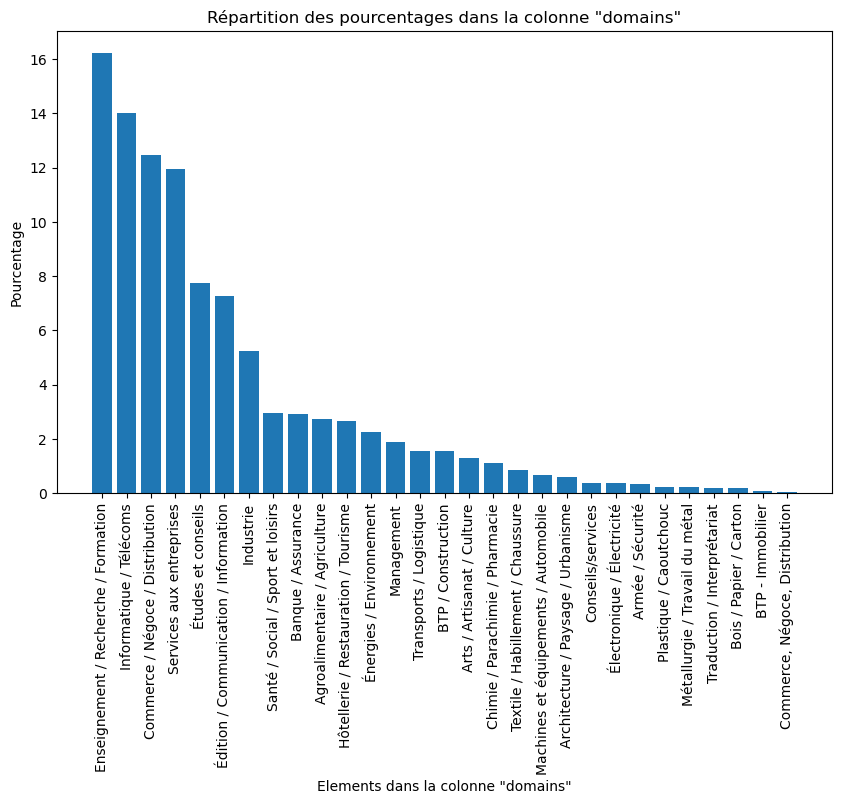

In [359]:
plt.figure(figsize=(10, 6))
plt.bar(Pourcentage.index, Pourcentage)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains"')
plt.xticks(rotation=90)

plt.show()

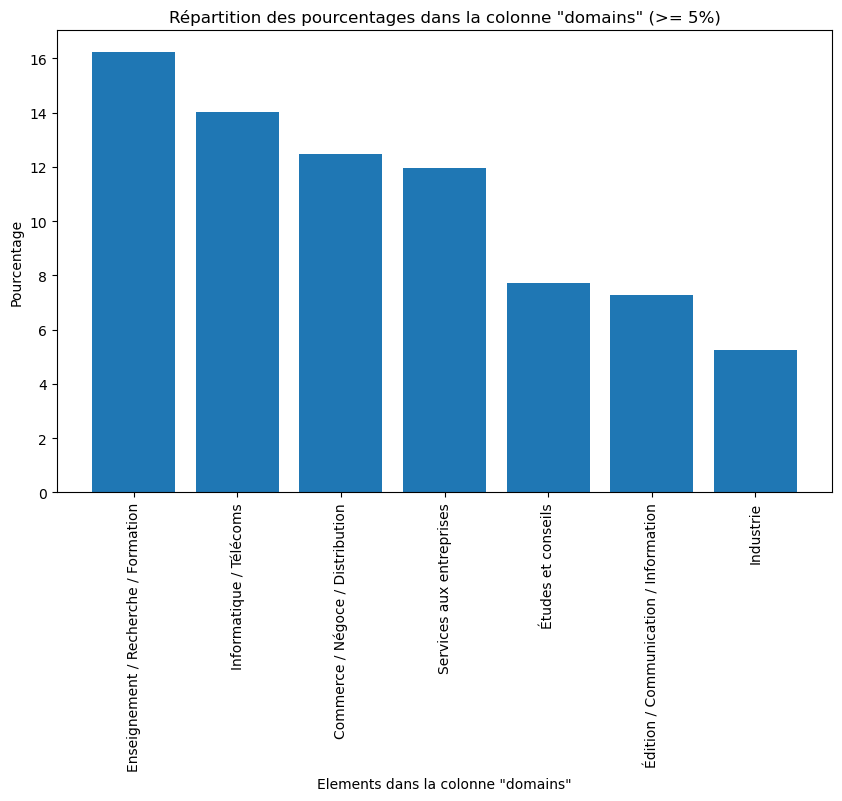

In [360]:
pourcentage_filtre = Pourcentage[Pourcentage >= 5]

plt.figure(figsize=(10, 6))
plt.bar(pourcentage_filtre.index, pourcentage_filtre)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains" (>= 5%)')
plt.xticks(rotation=90)

plt.show()

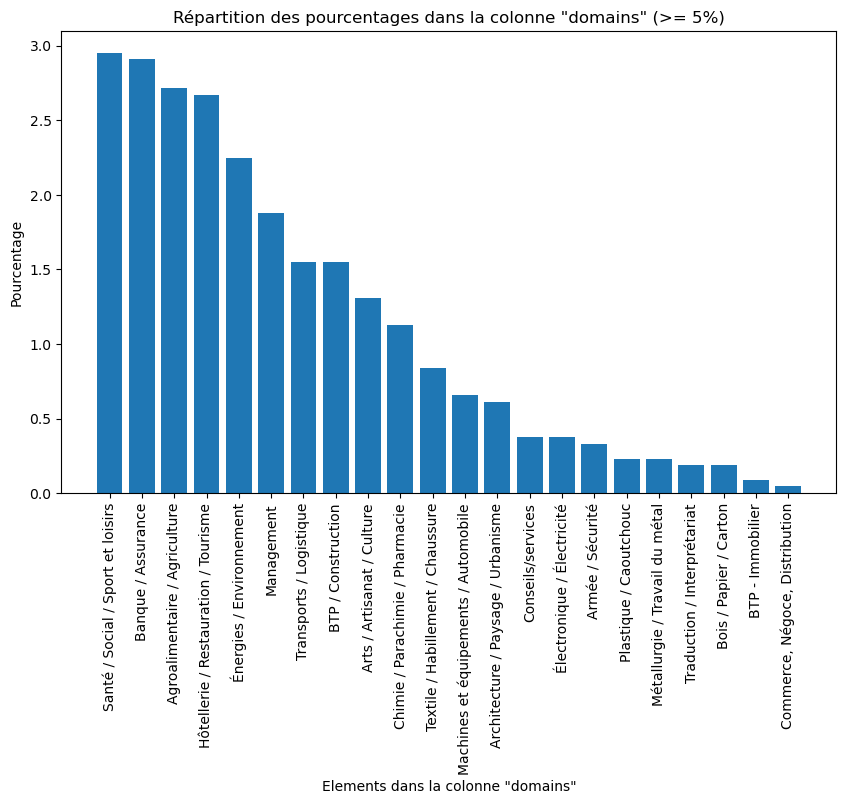

In [361]:
pourcentage_filtre = Pourcentage[Pourcentage <= 5]

plt.figure(figsize=(10, 6))
plt.bar(pourcentage_filtre.index, pourcentage_filtre)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains" (>= 5%)')
plt.xticks(rotation=90)

plt.show()

### Pourcentage d'experts par ville 

In [362]:
DFexp0.shape

(2455, 10)

In [363]:
DFexp

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01 19:49:42.590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,False,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01 16:41:00.078,NaN,NaN,NaN,NaN,Bordeaux,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,True,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-11-01,2023-12-01 10:34:32.307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse,...,"[{""date"":612396000000,""dateEnd"":1688421600000,...","[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,True,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,Saint-Étienne,...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,False,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27 14:23:54.005,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,False,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27 14:23:54.004,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,False,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15 08:50:42.806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...",Bordeaux,...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,False,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12 07:48:00.180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,False,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [364]:
Localisation = DFexp['location'].unique()
Localisation

array([nan, 'Bordeaux', 'Toulouse', 'Saint-Étienne ', 'Lyon ', 'France',
       'Paris', 'Bordeaux ', 'Paris ', 'SALLES',
       'Villefranche-sur-Saône ', 'Nantes ', 'Marseille ', 'BORDEAUX',
       'Auxerre', 'Ussel ', 'Montpellier ', 'Dax ', 'Agen ', 'Nantes',
       'Vannes ', 'Lyon', 'Hourtin ', 'Cuq ', 'Tarbes ', 'Béziers ',
       'Mérignac ', 'Lille', 'Toulouse ', 'VILLENOY', 'Sorède ',
       'Avignon ', '85230', 'La', 'BEAUGENCY', 'Noyal-sur-Vilaine ',
       'Agmé ', 'Montpellier', 'Strasbourg', 'Vélizy-Villacoublay ',
       'Nice ', 'Saint-Nazaire ', 'Gradignan ', 'Lille ', 'Grasse ', 'Le',
       'Île', 'Léognan ', 'Île-de-France ', 'Villemur', 'Grenoble ',
       'Rueil-Malmaison ', 'Europe', 'Nouvelle-Aquitaine ', 'Montguyon ',
       'Aix-en-Provence ', 'Bruges ', 'Arcueil ', 'Châtillon ',
       'Sérézin-du-Rhône ', 'Quimper ', 'Albi ', 'Cognac ',
       'Saint-André-de-Cubzac ', 'bayonne', 'Brest', 'Salon-de-Provence ',
       'ANNECY', 'BIARRITZ ', 'Anglet ', 'Ville

In [365]:
DFexp['location'] = DFexp['location'].str.split().str.get(0)
DFexp['location']

0                 NaN
1            Bordeaux
2            Toulouse
3       Saint-Étienne
4                 NaN
            ...      
2450         Bordeaux
2451         Libourne
2452         Bordeaux
2453         Bordeaux
2454         Bordeaux
Name: location, Length: 2455, dtype: object

In [366]:
DFexp['location'] = DFexp['location'].str.replace(',',' ')
DFexp['location']

0                 NaN
1            Bordeaux
2            Toulouse
3       Saint-Étienne
4                 NaN
            ...      
2450         Bordeaux
2451         Libourne
2452         Bordeaux
2453         Bordeaux
2454         Bordeaux
Name: location, Length: 2455, dtype: object

In [367]:
Ville_grouped = DFexp.groupby('location').size()
Ville_grouped_sorted = Ville_grouped.sort_values(ascending=False)
Top_10_villes = Ville_grouped_sorted.head(10)
Top_10_villes

location
Bordeaux         976
Paris            243
Lyon             133
Toulouse          70
Nantes            59
Lille             50
Montpellier       26
Bayonne           19
Île-de-France     19
France            18
dtype: int64

In [368]:
Pourcentage_ville = round((DFexp['location'].dropna().value_counts(normalize=True)*100), 2)
Pourcentage_ville

location
Bordeaux            47.13
Paris               11.73
Lyon                 6.42
Toulouse             3.38
Nantes               2.85
                    ...  
Saintes              0.05
Carbonne             0.05
Levallois-Perret     0.05
Seine-Maritime       0.05
france               0.05
Name: proportion, Length: 220, dtype: float64

In [369]:
pourcent_Top_10_villes = Pourcentage_ville.head(10)
pourcent_Top_10_villes

location
Bordeaux         47.13
Paris            11.73
Lyon              6.42
Toulouse          3.38
Nantes            2.85
Lille             2.41
Montpellier       1.26
Île-de-France     0.92
Bayonne           0.92
France            0.87
Name: proportion, dtype: float64

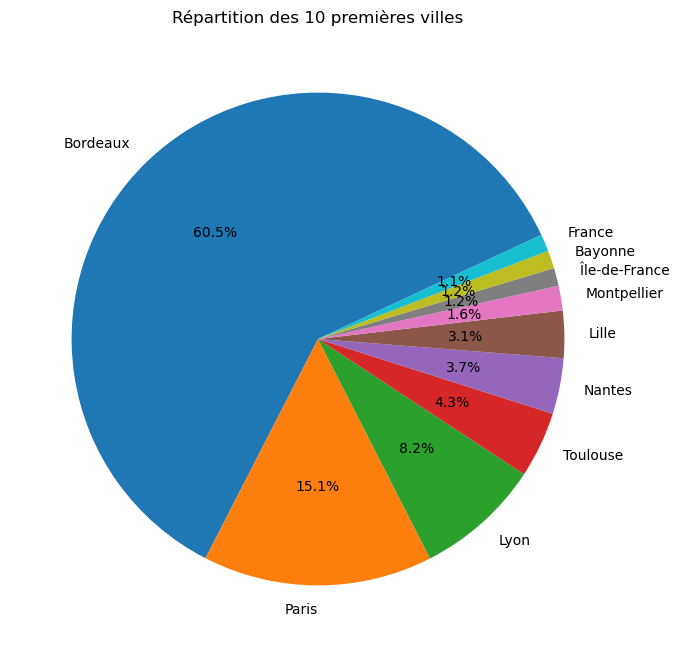

In [370]:
plt.figure(figsize=(8, 8))
plt.pie(pourcent_Top_10_villes, labels=pourcent_Top_10_villes.index, autopct='%1.1f%%', startangle=25)
plt.title('Répartition des 10 premières villes')
plt.show()


### Profil d'experts à profil complété à 100% 

In [371]:
profil_remplis = sum(DFexp['percentage']==100)
profil_remplis

1531

### pourcentage d'experts à profil incomplet 

In [372]:
profil_incomplet = sum(DFexp['percentage'] !=100)
profil_incomplet

924